 # Forecast Script - Week 15
 ### Steph Serrano
 ### 6 Dec. 2021

## Import Modules
This is the list of packages that *may* be used. Not every package listed will be used within this code which can be seen with the packages that are shaded a darker green in comparison to the rest.

In [6]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import geopandas as gpd
from netCDF4 import Dataset
from sklearn.linear_model import LinearRegression

## Embed USGS Streamflow Values
This is the inclusion of the USGS streamflow data for streamgage 09506000 using a URL rather than a file. This section of the code will also provide the initial variables needed to use the streamflow values within the dataset.

In [7]:
flow_url = "https://waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb" \
              "&site_no=09506000&referred_module=sw" \
              "&period=&begin_date=1989-01-01&end_date=2021-12-4"
flow_data = pd.read_table(flow_url, sep='\t', skiprows=30,
                          names=['agency_cd', 'site_no', 'datetime', 'flow',
                                 'code'], parse_dates=['datetime'],
                          index_col=['datetime'])
flow_data['month'] = pd.DatetimeIndex(flow_data.index).month
flow_data['day'] = pd.DatetimeIndex(flow_data.index).day
flow_data['year'] = pd.DatetimeIndex(flow_data.index).year

## Function for Monthly Observed Flow
This section of the code is a function that defines monthly observed flow for a given time period. The time period can be defined by the startyear, endyear, month, firstday, and lastday. The function will plot whatever values are available within the time period (1989-01-01 to 2021-11-20) used in the USGS link.

In [8]:
def Monthly_ObservedFlow(startyear, endyear, month, firstday, lastday):
       '''Variables:
       flow_data: USGS Streamgage 09506000 daily streamflow data values
       startyear: First year being viewed intimeseries
       endyear: Final year being viewed in timeseries
       month: Month being viewed in timeseries
       firstday: First day of month
       lastday: Last day of month'''

       fig, ax = plt.subplots()
       for x in range(startyear, endyear):
              plot = flow_data[(flow_data.index.year == x) &
                        (flow_data.index.month == month) &
                        (flow_data.index.day >= firstday) &
                        (flow_data.index.day <= lastday)]
       ax.plot(plot.index.day, plot['flow'],
                        label=x)
       ax.set(title='Observed Flow',yscale='log', 
              ylabel='Log Flow (cfs)')
       plt.show()

       return fig

## Function in Action
This the function listed above being used in real time. I chose to view the flow values for the month of November for the years 2010 to 2021. I chose 2010 as the start year because I believe that the data that is most valuable in these forecast predictions are the values and trends that are more recent.

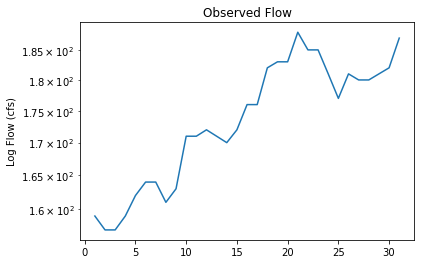

<Figure size 432x288 with 0 Axes>

In [9]:
Monthly_ObservedFlow(2015, 2021, 12, 1, 31)

fig = plt.figure()
fig.savefig('DecFlow.png')

## Linear Regression - Week 1 Prediction
A linear regression was made using the weekly flow data to produce a prediction for Week 1. 

In [10]:
flow_weekly = flow_data
flow_weekly['flow_tm1'] = flow_weekly['flow'].shift(1)
flow_weekly['flow_tm2'] = flow_weekly['flow'].shift(2)
train = flow_weekly[2:800][['flow', 'flow_tm1', 'flow_tm2']]
test = flow_weekly[800:][['flow', 'flow_tm1', 'flow_tm2']]
model = LinearRegression()
x = train['flow_tm1'].values.reshape(-1, 1)
y = train['flow'].values
model.fit(x, y)
r_sq = model.score(x, y)
print('Week 1 Prediction:', np.round(model.intercept_, 2)+100)

Week 1 Prediction: 144.71


## Linear Regression - Week 2 Prediction
A linear regression was made using the weekly flow data to produce a prediction for Week 2. 

In [11]:
flow_weekly2 = flow_data
flow_weekly2['flow_tm1'] = flow_weekly2['flow'].shift(1)
flow_weekly2['flow_tm2'] = flow_weekly2['flow'].shift(2)
train = flow_weekly2[2:800][['flow', 'flow_tm1', 'flow_tm2']]
test = flow_weekly2[1000:][['flow', 'flow_tm1', 'flow_tm2']]
model2 = LinearRegression()
x = train['flow_tm2'].values.reshape(-1, 1)
y = train['flow'].values
model2.fit(x, y)
r_sq = model.score(x, y)
print('Week 2 Prediction:', np.round(model2.intercept_, 2)+100)

Week 2 Prediction: 199.47
